# Разработать программу Python для статистического анализа по персоналу
## 1. Загрузить файл *csv в pandas dataframe

In [36]:
import pandas as pd
import seaborn as sns
import scipy.stats as sps

df = pd.read_csv("data/HR.csv")

## 2. Рассчитать статистики для переменных: среднее, медиана, мода, мин/макс, сред. отклонение

<Axes: >

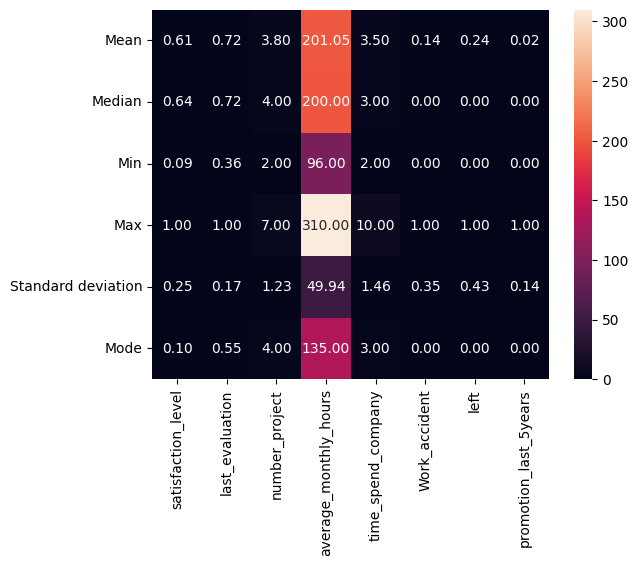

In [28]:
summary_stats = (df[
    ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company',
     'Work_accident', 'left', 'promotion_last_5years']
].
agg(['mean', 'median', 'min', 'max', 'std', lambda x: x.mode().iloc[0]]).
rename(
    index={'mean': 'Mean', 'median': 'Median', 'min': 'Min', 'max': 'Max', 'std': 'Standard deviation',
           '<lambda>': 'Mode'}
))

summary_stats = summary_stats.rename(
    index={'mean': 'Mean', 'median': 'Median', 'min': 'Min', 'max': 'Max', 'std': 'Standard deviation',
           '<lambda>': 'Mode'}
)

sns.heatmap(summary_stats, annot=True, fmt='.2f')

## 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных

In [29]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company',
    'Work_accident', 'left', 'promotion_last_5years']].corr()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## 4. Рассчитать, сколько сотрудников работает в каждом департаменте

In [30]:
department_count = df.groupby('department').size()
department_count

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

## 5. Показать распределение сотрудников по зарплатам

In [31]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [32]:
df.groupby(['department', 'salary']).size()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Гипотеза не подтвердилась, явной зависимости оклада от проведенного времени не видно, сотрудники с разным окладом в среднем работают примерно одинаковое кол-во часов

In [128]:
salary_level = ['low','high']
dataset = []
for salary in salary_level:
  avg=df.loc[df['salary']==salary,'average_monthly_hours'].sum()/df.loc[df['salary']==salary,'average_monthly_hours'].count()
  dataset.append([df.loc[df['salary']==salary,'average_monthly_hours'].count(),avg])
#print(dataset)

ratio, p = sps.fisher_exact(dataset)
if p_value > 0.05:
  print("Выборки независимы, гипотеза не подтвердилась")
else:
  print("Есть зависимость между временем работы и окладом, гипотеза подтвердилась")
print(f"Значение p-value: {p_value:.4f}")

df.groupby('salary')['average_monthly_hours'].agg(['mean', 'median', 'min', 'max', 'std'])

Выборки независимы, гипотеза не подтвердилась
Значение p-value: 1.0000


,mean,median,min,max,std
salary,,,,,
high,199.867421,199.0,96,307,47.710446
low,200.996583,199.0,96,310,50.832214
medium,201.338349,201.0,96,310,49.344188


## 8. Рассчитать среди уволившихся и не уволившихся сотрудников (по отдельности): долю сотрудников с повышением за последние 5 лет; среднюю степень удовлетворенности, среднее количество проектов

In [34]:
data = df[
    ['promotion_last_5years', 'satisfaction_level', 'number_project', 'left']
].groupby('left').mean()

data['promotion_last_5years'] = data['promotion_last_5years'].map(lambda x: x * 100)

data = data.rename(columns = {'promotion_last_5years': 'promotion_last_5years (%)'})

data


,promotion_last_5years (%),satisfaction_level,number_project
left,,,
0,2.625131,0.666810,3.786664
1,0.532064,0.440098,3.855503
